# T1_tutorial_for_using_data

This notebook stands as a tutorial(or example) for using the StockTwits data we provide to do some analysis. 
As the goal for this notebook is to show how to use the data, in this notebook, we provide a demo for a simple goal: how popular stocks' popularity V.S stock price looks like? This demo explains:
- how to a suitable dataset for a specific analysis
- how to access and manipulate the dataset
- how to complement the dataset with stock-related information by yfinance API
- NOTE: the demo is made in a python 3.11.2 kernal

### Import packages

In [1]:
### import packages, if certain package is not installed, please try pip install PACKAGE_NAME, or find in-detail help by searching. 

#### Packages for accessing and manipulating the data
import numpy as np
import pandas as pd
import json

#### Packages for plotting
import seaborn as sns
import matplotlib.pyplot as  plt

#### Package for getting stock price information
import yfinance as yf

### Choose the dataset for analysis goal:

In this demo, we want to analyze the relationship between stocks' popularity, measured by the number of posts that tagged the tickers, and stocks' actual price movement. Thus it is storage-saving to choose the dataset without message body and messages have tickers tagged. 

The path for the data in out dataset should be dataset/v1/data/csv/symbols/symbol_###.csv

In [3]:
path_in_AWS = 'dataset/v1/data/csv/symbols/symbol_###.csv'
have_symbol = pd.read_csv("E:\\analysis_data\\have_symbol_big.csv").drop(columns = 'Unnamed: 0')
have_symbol.head()

,message_id,user_id,created_at,sentiment,symbol_list,sym_number,symbol
0,4,593,2008-05-27,NaN,['V'],1,V
1,5,8687,2008-05-27,NaN,['NES'],1,NES
2,6,549,2008-05-27,NaN,['AAPL'],1,AAPL
3,7,170,2008-05-27,NaN,['XLE'],1,XLE
4,9,126,2008-05-27,NaN,['AAPL'],1,AAPL


### How to complement and analyze the data

As a demo, we are not doing anything complecated here. Say we take a example stock -- "AAPL" and we want to plot its popularity vs stock price over a period of six months, 2020-01-01 to 2020-06-01. 

In [4]:
aapl = have_symbol.loc[(have_symbol['symbol']=='AAPL')&(have_symbol['created_at']>='2020-01-01')&(have_symbol['created_at']<='2020-06-01')]

In [6]:
aapl.head()

,message_id,user_id,created_at,sentiment,symbol_list,sym_number,symbol
48585020,188613328,1196693,2020-01-01,NaN,['AAPL'],1,AAPL
48585036,188613383,1417485,2020-01-01,NaN,['AAPL'],1,AAPL
48585087,188613519,619769,2020-01-01,NaN,"['AAPL', 'DIS']",2,AAPL
48585101,188613549,1758623,2020-01-01,NaN,['AAPL'],1,AAPL
48585137,188613631,1945367,2020-01-01,1.0,['AAPL'],1,AAPL


In [14]:
### get the popularity by message_count
mes_count = aapl[['message_id','created_at']].groupby(by = 'created_at').size().reset_index().rename(columns = {0:'message_count', 'created_at':'date'})
mes_count['date'] = pd.to_datetime(mes_count['date'])

<Axes: xlabel='date', ylabel='message_count'>

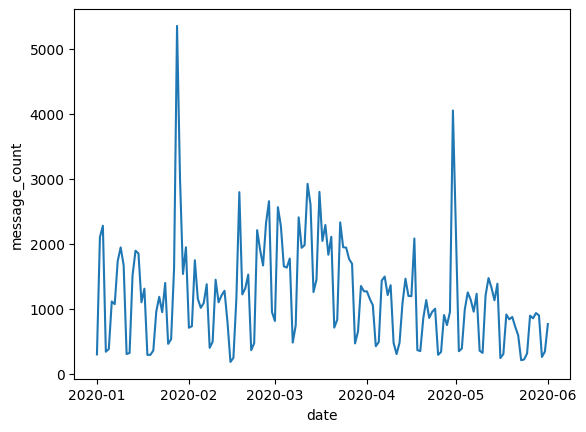

In [16]:
### plot the message count over time 
sns.lineplot(data = mes_count, x = 'date', y = 'message_count')

In [19]:
### get stock price information with yfinance package
price_info = yf.download('AAPL', start="2020-01-01", end="2020-06-01")
price_info.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400558,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200


<Axes: xlabel='Date', ylabel='Close'>

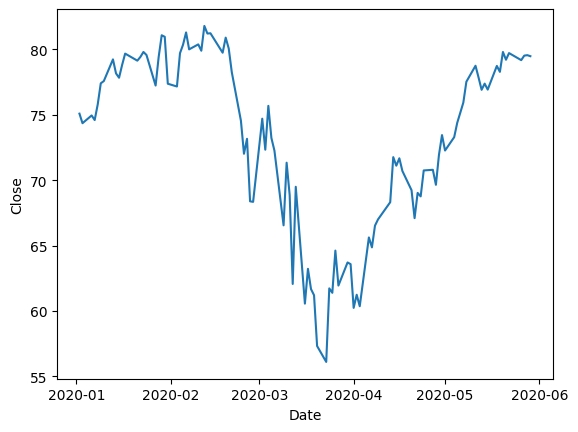

In [21]:
### plot the close price movement
price_info = price_info.reset_index()
sns.lineplot(data = price_info, x = 'Date', y = 'Close')

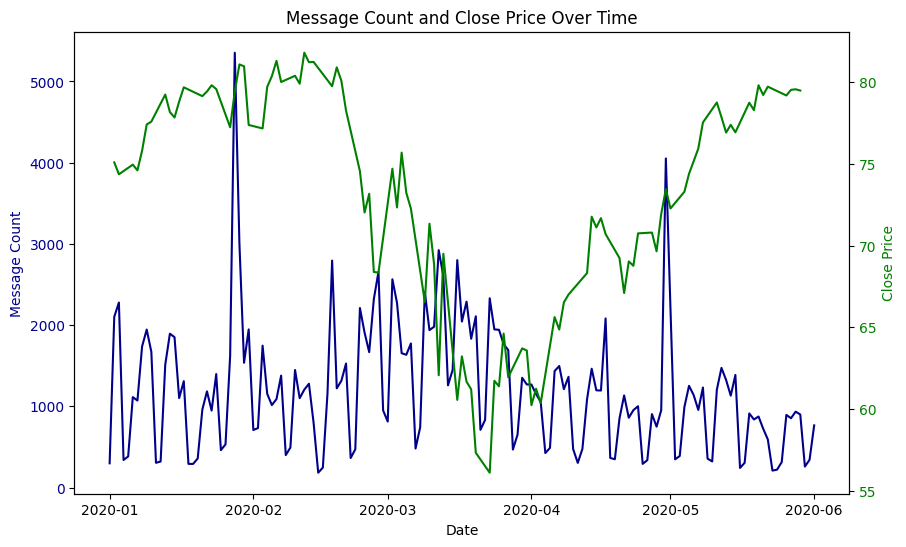

In [26]:
### putting these plots together:
fig, ax1 = plt.subplots(figsize=(10, 6))

# First plot: Message count over time
sns.lineplot(data=mes_count, x='date', y='message_count', ax=ax1, color='darkblue')
ax1.set_ylabel('Message Count', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Create a second y-axis for the Close price
ax2 = ax1.twinx()  # Share the same x-axis
sns.lineplot(data=price_info, x='Date', y='Close', ax=ax2, color='green')
ax2.set_ylabel('Close Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set common x-axis label
ax1.set_xlabel('Date')

plt.title('Message Count and Close Price Over Time')
plt.show()
